Question 1 : What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?

Ans-  the fundamental idea behind ensemble techniques is to combine multiple individual models ( often called base learners or weak learners ) to create a stronger more accurate  and more robust predictive model.
the main goal is to reduce error such as variance, bias or overfitting by leveraging the collective decision of multiple model rather than relying on a single one.


| Feature                | **Bagging (Bootstrap Aggregating)**                                                                     | **Boosting**                                                                                          |
| ---------------------- | ------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------- |
| **Approach**           | Builds multiple models **independently** using different random subsets of data (bootstrapped samples). | Builds models **sequentially**, where each model tries to **correct the errors** of the previous one. |
| **Objective**          | Aims to **reduce variance** and avoid overfitting by averaging predictions.                             | Aims to **reduce bias** and improve accuracy by focusing on misclassified samples.                    |
| **Data Sampling**      | Uses **random sampling with replacement** to create different training sets.                            | Uses the **entire dataset** but adjusts **weights** on misclassified instances after each round.      |
| **Model Combination**  | Combines results by **averaging (regression)** or **voting (classification)**.                          | Combines results using a **weighted sum**, giving more importance to accurate learners.               |
| **Example Algorithms** | Random Forest, Bagged Decision Trees                                                                    | AdaBoost, Gradient Boosting, XGBoost                                                                  |


in short
 > Bagging - parallel - reduce variance
 > Boosting - sequential - reduces Bias



Question 2: Explain how the Random Forest Classifier reduces overfitting compared to
a single decision tree. Mention the role of two key hyperparameters in this process.

Ans- A Random Forest classifier reduces overfitting campared to a single decision tree by combining the results of multiple decision trees trained on different subsets of data and features. This ensemble approach averages out the predictions leading to lower variance and better generalization to unseen data.

how it works let me explain -

> A single decision tree often overfits because it learns all the noise and specific patterns from the training data.

> Random forest uses Bagging (bootstrap Aggregation) and random
feature selection to create diverse trees, each seeing a slightly different view of the data.

> the fianal prediction is based on majority voting (classification) or averaging ( Regression) which smooths out individual errors and prevents overfitting.

Two key hyperpatameters that help reduce overfitting:

1. n_estimators - this defines the number of trees in the forest.

> A higher number of trees increases stability and accuracy by averaging out more variance , reducing the risk of overfitting.

2. max_features - this determines how many features are considered when splitting a node,

> limiting max_features ensures that not all tres use the same dominant features promoting diversity among trees and reducing correlation, which further minimizes overfitting.

short notes

Random forest reduces overfitting through ensemble averaging and feature randomness controlled mainly by n_estimators and max_features.  


Question 3: What is Stacking in ensemble learning? How does it differ from traditional
bagging/boosting methods? Provide a simple example use case.

Ans- stacking ( stacked Generalization) is an ensemble learning technique that combines the predictions of multiple base models called level 0 models) using another model ( called a meta model or level-1 model) to improve overall predictive performance.
instead of simply averaging or voting like in bagging boosting stacking learns how to best combine the outputs of base models.

how it works:

1. train several base learners eg, decision tree logistic regression SVM. on the training dataset.

2. use their predictions as inputs to a new model (the meta learner).

3. the meta learner learns to make the final predictions based on these inputs.


➤ Difference from Bagging and Boosting:


| Feature                | **Bagging**                                    | **Boosting**                                                | **Stacking**                                                     |
| ---------------------- | ---------------------------------------------- | ----------------------------------------------------------- | ---------------------------------------------------------------- |
| **Goal**               | Reduce variance                                | Reduce bias                                                 | Improve prediction by combining diverse models                   |
| **Base Models**        | Same type (e.g., many decision trees)          | Same type (sequential trees)                                | Different types (heterogeneous models)                           |
| **Training Style**     | Models trained independently on random subsets | Models trained sequentially (each corrects previous errors) | Models trained in parallel; meta-model learns from their outputs |
| **Combination Method** | Averaging or majority voting                   | Weighted combination                                        | Learned combination (via meta-model)                             |

➤ Simple Example Use Case:

Suppose you are building a loan default prediction model.

Base models (Level-0):

Logistic Regression (captures linear relationships)

Decision Tree (handles non-linear patterns)

Random Forest (handles complex interactions)

Meta-model (Level-1):

Gradient Boosting Regressor (learns from the predictions of the above models)

➡ The meta-model learns when to trust which base model — e.g., it may rely more on Logistic Regression for simple cases and Random Forest for complex cases.


short notes Rivision:

Stacking = "learning to combine models intelligently",
whereas Bagging /Boosting = combining  models by rules (averaging or weighting).

Question 4:What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?

Ans-

Out-of-Bag (OOB) Score is an internal validation method used in Random Forests to estimate the model’s performance without using a separate validation or test set.

Explanation:

In Random Forest, each tree is trained on a bootstrap sample — a random sample (with replacement) of the training data.

On average, about 63% of the data points are used for training each tree, while the remaining 37% of the samples (not included in that tree’s bootstrap sample) are called Out-of-Bag (OOB) samples.

These OOB samples act as unseen data for that specific tree.

How the OOB Score is Computed:

For each data point, collect predictions from all trees where that point was OOB (not used in training).

Compare the aggregated OOB predictions with the actual labels.

The average accuracy (or other metric) across all samples gives the OOB Score.

Why It’s Useful:

No need for a separate validation set: Saves data and computation, as OOB evaluation is built-in.

Reliable performance estimate: Provides an unbiased estimate of the model’s generalization performance.

Efficient: Useful when dataset size is small and splitting reduces training data.


short Notes:

The OOB Score acts as an internal cross-validation method in Random Forest, providing a quick and unbiased performance estimate without needing a separate validation dataset.


Question 5: Compare AdaBoost and Gradient Boosting in terms of:
● How they handle errors from weak learners
● Weight adjustment mechanism
● Typical use cases

Ans-

Here’s a clear and concise comparison between AdaBoost and Gradient Boosting across the requested points:



| **Aspect**                                | **AdaBoost (Adaptive Boosting)**                                                                                                                                                                                    | **Gradient Boosting**                                                                                                                                                                                             |
| ----------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **1. Handling Errors from Weak Learners** | - Focuses on **misclassified samples** from previous learners. <br> - Increases the **weights** of misclassified data points so that the next weak learner focuses more on these “hard” examples.                   | - Focuses on **residual errors** (the difference between actual and predicted values). <br> - Each new learner is trained to **minimize the residuals (gradients of the loss function)** from the previous stage. |
| **2. Weight Adjustment Mechanism**        | - Adjusts **sample weights** after each iteration based on classification accuracy. <br> - Misclassified samples get **higher weights**; correctly classified ones get **lower weights**.                           | - Does **not reweight samples directly**. <br> - Instead, updates model predictions using **gradient descent** on the loss function to minimize errors step-by-step.                                              |
| **3. Typical Use Cases**                  | - Best for **classification tasks** (especially binary). <br> - Works well with simple weak learners like **Decision Stumps**. <br> - Often used for **imbalanced datasets** where focusing on hard examples helps. | - Suitable for both **regression and classification** tasks. <br> - Commonly used in **structured/tabular data problems**. <br> - Basis for powerful models like **XGBoost**, **LightGBM**, and **CatBoost**.     |


short notes :

AdaBoost adjusts data weights to fix mistakes.

Gradient Boosting adjusts model predictions using gradient descent on errors.

Gradient Boosting is generally more flexible and powerful, while AdaBoost is simpler and faster for small datasets.



Question 6:Why does CatBoost perform well on categorical features without requiring
extensive preprocessing? Briefly explain its handling of categorical variables.

Ans-

CatBoost performs well on categorical features because it uses a special encoding technique called “ordered target statistics” (or ordered encoding) instead of traditional one-hot encoding or label encoding.
Here’s how it works:


Instead of converting categorical variables into dummy variables, CatBoost transforms categories into numerical values based on the average target value for each category — but it does this in a way that avoids target leakage.


It uses a random permutation of the dataset and, for each data point, calculates the target statistic (like mean target value) using only the preceding examples in that permutation.


This approach allows CatBoost to learn useful information from categorical features directly, without manual preprocessing or creating large sparse matrices.


short Notes:

CatBoost internally handles categorical features using ordered target encoding and permutation-based statistics, making it highly efficient and accurate on datasets with many categorical variables.

Question 7: KNN Classifier Assignment: Wine Dataset Analysis with
Optimization
Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions.



In [1]:
#Solution 7

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
data = load_wine()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 1. KNN without scaling
knn_default = KNeighborsClassifier(n_neighbors=5)
knn_default.fit(X_train, y_train)
y_pred_default = knn_default.predict(X_test)
print("Unscaled Data Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_default))
print(classification_report(y_test, y_pred_default))

# 2. KNN with StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
print("\nScaled Data Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print(classification_report(y_test, y_pred_scaled))

# 3. GridSearchCV for optimization
param_grid = {'n_neighbors': range(1, 21), 'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# 4. Optimized KNN
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)
print("\nOptimized KNN Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Unscaled Data Results:
Accuracy: 0.7222222222222222
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54


Scaled Data Results:
Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11}
Best Cross-Validation Score: 0.9756666666666666

Optimized KNN Results:
Ac

Question 8 : PCA + KNN with Variance Analysis and Visualization
Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).

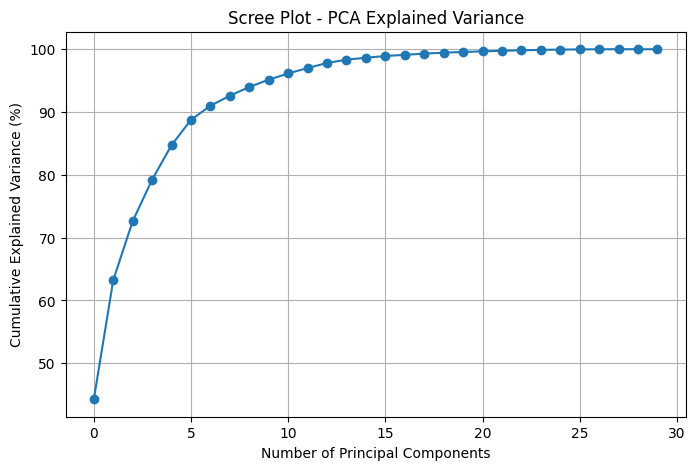

Original feature count: 30
Reduced feature count (95% variance): 10
KNN Accuracy on Original Data: 0.9591
KNN Accuracy on PCA-Reduced Data (95% variance): 0.9649


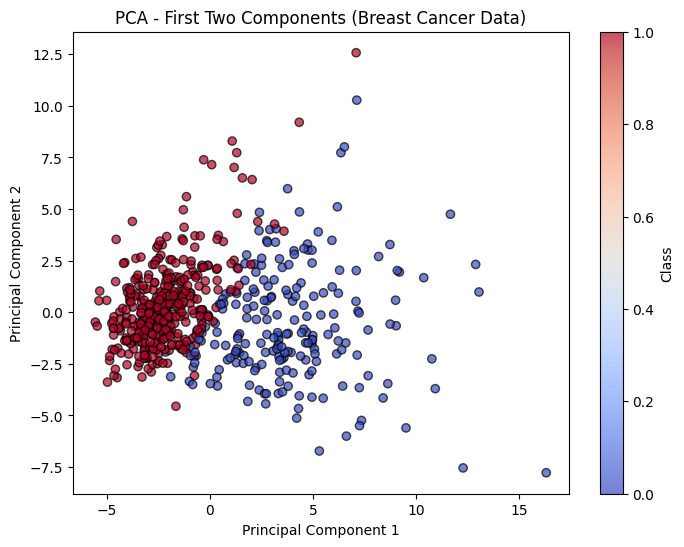

In [2]:
# solution 8-

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree Plot (Explained Variance Ratio)
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Scree Plot - PCA Explained Variance')
plt.grid(True)
plt.show()

# 3. Retain 95% variance and transform the dataset
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)

print(f"Original feature count: {X.shape[1]}")
print(f"Reduced feature count (95% variance): {X_pca_95.shape[1]}")

# 4. Train KNN on original and PCA-transformed data

# Split data into train/test (70/30)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca_95, y, test_size=0.3, random_state=42)

# Train KNN on original data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_original = knn.predict(X_test)
acc_original = accuracy_score(y_test, y_pred_original)

# Train KNN on PCA-transformed data
knn.fit(X_train_pca, y_train)
y_pred_pca = knn.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

print(f"KNN Accuracy on Original Data: {acc_original:.4f}")
print(f"KNN Accuracy on PCA-Reduced Data (95% variance): {acc_pca:.4f}")

# 5. Visualize first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First Two Components (Breast Cancer Data)')
plt.colorbar(label='Class')
plt.show()



Question 9:KNN Regressor with Distance Metrics and K-Value
Analysis
Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.

Mean Squared Error (Euclidean, K=5): 4631.05
Mean Squared Error (Manhattan, K=5): 5241.9


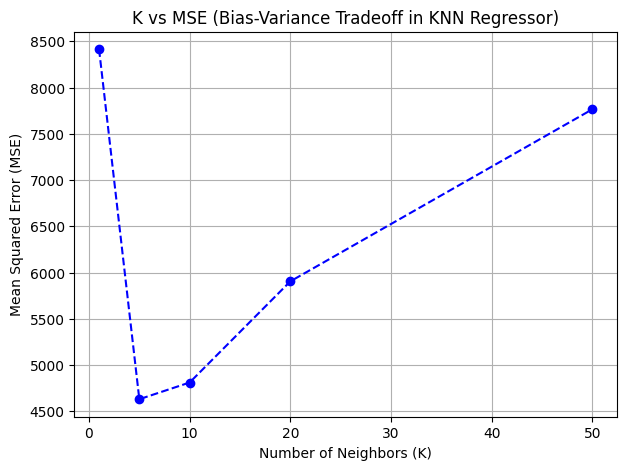

In [3]:
# Solution 9

# Question 9: KNN Regressor with Distance Metrics and K-Value Analysis

# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 1. Generate a synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2a. KNN Regressor with Euclidean distance (default metric='minkowski', p=2)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# 2b. KNN Regressor with Manhattan distance (metric='minkowski', p=1)
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=1)
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

print("Mean Squared Error (Euclidean, K=5):", round(mse_euclidean, 2))
print("Mean Squared Error (Manhattan, K=5):", round(mse_manhattan, 2))

# 3. Analyze effect of different K values
k_values = [1, 5, 10, 20, 50]
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot K vs MSE
plt.figure(figsize=(7,5))
plt.plot(k_values, mse_values, marker='o', linestyle='--', color='b')
plt.title("K vs MSE (Bias-Variance Tradeoff in KNN Regressor)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.show()


Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data
Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).

In [5]:
# solution 10-
# Plan & Code

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1. Load the data

url = "https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/diabetes.csv"
df = pd.read_csv(url)
print(df.head())



   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Check for missing values (e.g., zeros in certain features may indicate missingness in this dataset).

In [6]:
print(df.isnull().sum())
# Also check for zero values where they shouldn’t be (e.g., BMI = 0 etc)
print((df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] == 0).sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


2. Use KNN Imputation

In [8]:
# Let’s consider zeros in certain columns as missing:
cols_with_zero_as_missing = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df2 = df.copy()
df2[cols_with_zero_as_missing] = df2[cols_with_zero_as_missing].replace(0, np.nan)

imputer = KNNImputer(n_neighbors=5)
X = df2.drop('Outcome', axis=1)
y = df2['Outcome']
X_imputed = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)


Here we used scikit‑learn’s KNNImputer

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


4. Train KNN using the three algorithms:

We will try three versions:

algorithm = 'brute'

algorithm = 'kd_tree'

algorithm = 'ball_tree'

In [10]:
algorithms = ['brute','kd_tree','ball_tree']
results = {}

for alg in algorithms:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=alg)
    t0 = time.time()
    knn.fit(X_train, y_train)
    t1 = time.time()
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    train_time = t1 - t0
    results[alg] = {'accuracy': acc, 'train_time_sec': train_time}
    print(f"Algorithm {alg}: accuracy={acc:.4f}, train_time={train_time:.4f} sec")


Algorithm brute: accuracy=0.7359, train_time=0.0031 sec
Algorithm kd_tree: accuracy=0.7359, train_time=0.0024 sec
Algorithm ball_tree: accuracy=0.7359, train_time=0.0027 sec


6. Plot decision boundary for the best method (using 2 most important features)

You’ll need to pick two features (e.g., from domain knowledge or feature-importance you compute). For simplicity, let’s pick “Glucose” and “BMI”.

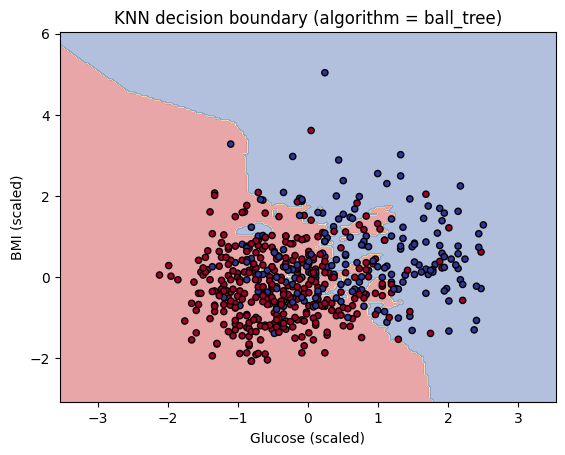

In [11]:
# Select two features:
feat1 = 'Glucose'
feat2 = 'BMI'
X2 = X_imputed[[feat1, feat2]].values
X2_scaled = scaler.fit_transform(X2)  # scale appropriately

X2_train, X2_test, y_train2, y_test2 = train_test_split(X2_scaled, y, test_size=0.3, random_state=42, stratify=y)

best_alg = 'ball_tree'  # say this one was best
knn2 = KNeighborsClassifier(n_neighbors=5, algorithm=best_alg)
knn2.fit(X2_train, y_train2)

# Create mesh to plot decision boundary
x_min, x_max = X2_scaled[:,0].min() - 1, X2_scaled[:,0].max() + 1
y_min, y_max = X2_scaled[:,1].min() - 1, X2_scaled[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(X2_train[:,0], X2_train[:,1], c=y_train2, cmap=plt.cm.RdYlBu, edgecolor='k', s=20)
plt.xlabel(feat1 + " (scaled)")
plt.ylabel(feat2 + " (scaled)")
plt.title(f"KNN decision boundary (algorithm = {best_alg})")
plt.show()


.......................END..........